# Putting it all together 

For this practice we will practice putting different elements on a map and learn how to put them on in a way that they become multiples layers on the leaflet map that can be toggled off and on. 

For this practice, we will explore the following data sets:
 * European Countries Geo Json file, FYI includes part of Israel - located in the data directory for this module (europe.geojson). This will be used to create a Choropleth using population values
 * Points of Interest shape file (http://www.mapcruzin.com/download-shapefile/europe-places-shape.zip), we will be using the first 100 so as to not overload the system. This will be used to create markers 

In [1]:
# import packages
import pandas as pd
import geopandas as gpd
import json
import sys
import os
import urllib.request
import shutil
from pathlib import Path
from zipfile import ZipFile
import folium
from folium.plugins import MarkerCluster
from branca.colormap import linear

## Task 1: Load Data
Load the dataset to be used.

In [2]:
## M3:P1:Cell01
# Add Your Code load the European Countries dataset
# -------------------------------------------------
GEODATA_FILE = '../data/europe.geojson'
countries = gpd.read_file(GEODATA_FILE, layer=0)

In [3]:
## M3:E1:Cell02
# Add Your Code to Download / unzip and load the interesting places data.
# ----------------------------------------------------------------------
#Designate the URL for a file
file_URL = 'http://www.mapcruzin.com/download-shapefile/europe-places-shape.zip'
#Designate the local file name
local_file_name= 'europe_places.zip'
#Designate the local file name with a path to the temp directory
file_path = Path('../temp/')
file_path /= local_file_name
 #Download the file from the url and save it locally under file_Path:
with urllib.request.urlopen(file_URL) as response, file_path.open(mode='w+b')as outfile:
    shutil.copyfileobj(response,outfile)
to_unzip = ZipFile('../temp/europe_places.zip','r')
unzipped = '../temp/europe_places'
to_unzip.extractall(unzipped)
to_unzip.close()

### Task 2: Examine Datasets

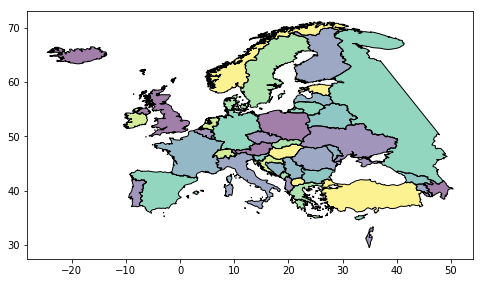

In [4]:
# display a map with the countries outlined. 
import matplotlib as plt
%matplotlib inline
countries.plot(figsize=(8,8))

In [5]:
countries.head()

AREA  FID FIPS ISO2 ISO3     LAT     LON                    NAME  POP2005  \
0   8260  0.0   AJ   AZ  AZE  40.430  47.395              Azerbaijan  8352021   
1   2740  0.0   AL   AL  ALB  41.143  20.068                 Albania  3153731   
2   2820  0.0   AM   AM  ARM  40.534  44.563                 Armenia  3017661   
3   5120  0.0   BK   BA  BIH  44.169  17.786  Bosnia and Herzegovina  3915238   
4  11063  0.0   BU   BG  BGR  42.761  25.231                Bulgaria  7744591   

   REGION  SUBREGION   UN                                           geometry  
0     142        145   31  (POLYGON ((45.083321 39.76804400000015, 45.266...  
1     150         39    8  POLYGON ((19.436214 41.021065, 19.450554 41.05...  
2     142        145   51  (POLYGON ((45.57305100000013 40.632488, 45.528...  
3     150         39   70  POLYGON ((17.649841 42.889076, 17.578526 42.94...  
4     150        151  100  POLYGON ((27.879166 42.841103, 27.894997 42.80...

In [6]:
# Look at the head of the interest data.
GEODATA_FILE = '../temp/europe_places'
interest = gpd.read_file(GEODATA_FILE)
interest.head(10)

geometry                name  osm_id  \
0          POINT (8.3013034 50.1359444)    Wiesbaden-Naurod       2   
1         POINT (-2.5953934 51.4558166)             Bristol  104849   
2          POINT (-0.1278195 51.507252)              London  107775   
3          POINT (1.1820034 52.0027574)        Woolverstone  132591   
4           POINT (1.2087457 51.989904)       Chelmondiston  132593   
5          POINT (0.5181949 51.6503583)  South Hanningfield  132634   
6          POINT (0.4994911 51.6706392)   West Hanningfield  132635   
7         POINT (-1.7937047 51.2387924)          Netheravon  134366   
8  POINT (8.943663600000001 60.7016106)                 Gol  149514   
9         POINT (-0.1997418 51.6529938)              Barnet  195439   

   population     type  
0           0  village  
1           0     city  
2     7556900     city  
3           0   hamlet  
4           0  village  
5           0  village  
6           0  village  
7           0  village  
8           0  village  
9           0     town

### Task 3: Choropleth
Now that the data is ready to be used let's create a Choropleth map using the European Countries dataset that includes the population numbers.  

In [7]:
## M3:P1:Cell03
# Add Your Code for creating a color map here, it is your choice on color scale used. Display the scale
# -----------------------------------------------------------------------------------------------------
colormap = linear.OrRd.scale(
    countries.POP2005.min(),
    countries.POP2005.max())
colormap

In [8]:
## M3:P1:Cell04
# Add Your Code for creating a population dictionary it should include name and the population. 
# --------------------------------------------------------------------------------------------
population_dict = countries.set_index('NAME')['POP2005']
population_dict['Armenia'].dtype


dtype('int64')

In [9]:
# M3:P1:Cell05
# Add Your Code to create a folium map that is displaying the Choropleth. 
# -----------------------------------------------------------------------

# Create a map object centered to (47.751569, 1.675063), starting at zoom level 3 and CartoDB Positron map tiles. 
m = folium.Map([47.751569,1.675063],tiles ='CartoDB Positron',zoom_start=3)

# apply the county outlines to the map and save this object as Choropleth
Choropleth = folium.GeoJson(countries,#Data goes here, 
                            name='Choropleth', 
               style_function=lambda feature: {
                'fillColor': colormap(population_dict[feature['properties']['NAME']]),
                'color' : 'black',
                'weight' : 1,
                'fillOpacity' : .9,
               } 
                          
              )

# Overlay the image to the map
m.add_child(Choropleth)

# display map
m

In [10]:

# Add Your Code to create a folium map that is displaying the Choropleth. 
# -----------------------------------------------------------------------

# Create a map object centered to (47.751569, 1.675063), starting at zoom level 3 and CartoDB Positron map tiles. 
m = folium.Map([47.751569,1.675063],tiles ='CartoDB Positron',zoom_start=3)

#style function
def style_function(feature):
    return {
        'fillOpacity': 0.9,
        'weight': 1,
       # 'Use the line below to build your fillColor.
       # 'fillColor': colormap(population_dict[feature[/*This will not be id as the two datasets do not align on id*/]])
        'fillColor' : colormap(population_dict[feature['properties']['NAME']])
    }

# apply the county outlines to the map and save this object as Choropleth
Choropleth = folium.GeoJson( countries,#Data goes here, 
                            name='Choropleth', 
               style_function=lambda feature: {
                'fillColor': colormap(population_dict[feature['properties']['NAME']]),
                'color' : 'black',
                'weight' : 1,
                'fillOpacity' : .9,
               } 
                          
              )


# apply the county outlines to the map, XXXX needs to be replaced
folium.GeoJson(countries,
               name='Choropleth',
               style_function=style_function
              ).add_to(m)

# Overlay the image to the map

m.add_child(Choropleth)
# display map
m

### Task 4: Markers
Now lets create a map and place the first 100 points of interest on it. 

In [75]:
## M3:P1:Cell06
# Add Your Code to create a folium map that is displaying the first 100 points of interest as cluster markers.
# When a user clicks on a single marker the marker should display the name of the point of interest. 
# ------------------------------------------------------------------------------------------------------------

# Create a map object centered to (47.751569, 1.675063), starting at zoom level 3 and Open Street map tiles. 
m1 = folium.Map([47.751569,1.675063],tiles = 'OpenStreetMap',zoom_start=3)

# Create a loop to iterator over the points of interest use if index == 100: break to stop the loop at 100. 
labels,locations = [],[]

for index,row in interest.iterrows():
    if index == 100:
        break
    labels.append('<i>' + row['name'] + '</i>')
    for i in row[['geometry']]:
        locations.append([i.y,i.x])
#         print(i.x)
#         print(i.y)
h = folium.FeatureGroup(name='Points')
Cluster = MarkerCluster(locations=locations,popups=labels,name='Points of interest')
h.add_child(Cluster)
# add the markers to the map
m1.add_child(h)
# display map
m1


### Task 5: One Map 
Now that you have created two different maps, let's make one map that has two layers instead. 
No code should need to be added. 

In [76]:
# create map
one_map = folium.Map([47.751569, 1.675063], tiles='Stamen Toner', zoom_start=6)

# Add Marker Cluster
one_map.add_child(Cluster)

# Add Choropleth
one_map.add_child(Choropleth)

# add the layer control
folium.LayerControl().add_to(one_map)

# display map
one_map